In [ ]:
'''
Pandas Homework with IMDb data
'''

In [ ]:
'''
BASIC LEVEL
'''

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = r'imdb_1000.csv'
movies = pd.read_csv(imdb_1000_data_url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
# check the number of rows and columns
movies.shape

(979, 6)

In [4]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [5]:
# calculate the average movie duration
movies.duration.mean()

120.97957099080695

In [61]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values('duration').head(1)
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


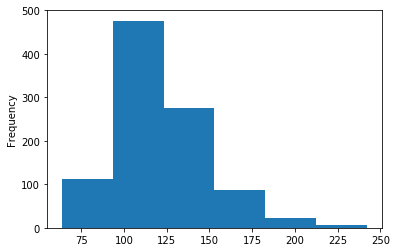

In [18]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot(kind='hist', bins=6)

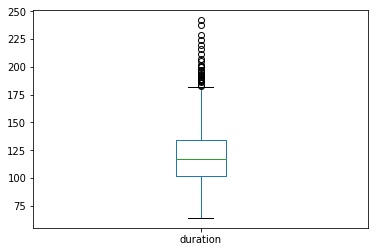

In [26]:
# use a box plot to display that same data
movies.duration.plot(kind='box')

In [ ]:
'''
INTERMEDIATE LEVEL
'''

In [27]:
# count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

(Text(0.5,0,'star rating'), Text(0,0.5,'content rating'))

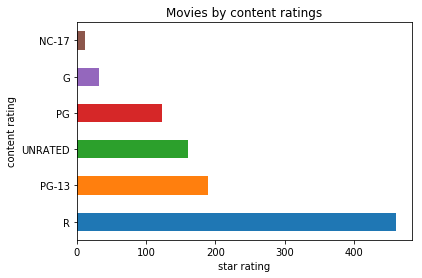

In [33]:
# use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind='barh', title='Movies by content ratings')
plt.xlabel('star rating'), plt.ylabel('content rating')

In [46]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace = True)

In [24]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace = True)

In [42]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [52]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isnull()]
movies.content_rating.fillna('UNRATED', inplace=True)

In [27]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
movies[movies.duration >= 120].star_rating.mean()
movies[movies.duration < 120].star_rating.mean()


7.838666666666657

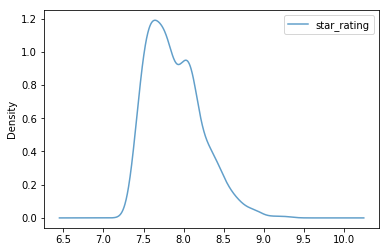

In [34]:
# use a visualization to detect whether there is a relationship between duration and star rating
movies.plot(kind='density', x='duration', y='star_rating', alpha=0.7)

In [28]:
# calculate the average duration for each genre
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [ ]:
'''
ADVANCED LEVEL
'''

In [8]:
# visualize the relationship between content rating and duration

In [47]:
# determine the top rated movie (by star rating) for each genre

movies.sort_values('star_rating', ascending = False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [56]:
movies.groupby('genre')[['title', 'star_rating']].max()

,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


In [36]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dupl_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupl_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [ ]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies


In [ ]:
# option 1: manually create a list of relevant genres, then filter using that list


In [ ]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering


In [43]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [ ]:
# option 4: aggregate by count and mean, then filter using the count


In [ ]:
'''
BONUS
'''

In [ ]:
# Figure out something "interesting" using the actors data!
